In [28]:
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import contextily as cx

In [2]:
gdf = gpd.read_file('gadm41_EGY_2.shp')

In [3]:
gdf

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,EGY.1.1_1,EGY,Egypt,EGY.1_1,Ad Daqahliyah,الدقهلية,Aja,Aga,NA,Markaz,Subdivision,NA,EG.DQ.AG,"POLYGON ((31.30377 30.99935, 31.31002 30.99356..."
1,EGY.1.2_1,EGY,Egypt,EGY.1_1,Ad Daqahliyah,الدقهلية,Al-Jamaliyah,NA,NA,Kism,Subdivision,NA,EG.QH.GA,"POLYGON ((31.99799 31.22747, 31.98231 31.22915..."
2,EGY.1.3_1,EGY,Egypt,EGY.1_1,Ad Daqahliyah,الدقهلية,Al-Mansurah,NA,NA,Markaz,Subdivision,NA,EG.DQ.MA,"POLYGON ((31.39126 30.93035, 31.38016 30.96288..."
3,EGY.1.4_1,EGY,Egypt,EGY.1_1,Ad Daqahliyah,الدقهلية,Al-Mansurah 1,NA,NA,Kism,Subdivision,NA,EG.DQ.MF,"POLYGON ((31.39234 31.01250, 31.37525 31.00095..."
4,EGY.1.5_1,EGY,Egypt,EGY.1_1,Ad Daqahliyah,الدقهلية,Al-Mansurah 2,NA,NA,Markaz,Subdivision,NA,EG.DQ.MK,"POLYGON ((31.39234 31.01250, 31.38253 31.03385..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,EGY.27.14_1,EGY,Egypt,EGY.27_1,Suhaj,NA,Sawhaj 2,NA,NA,Kism,Subdivision,NA,EG.SJ.SS,"POLYGON ((31.70411 26.56144, 31.70938 26.54274..."
339,EGY.27.15_1,EGY,Egypt,EGY.27_1,Suhaj,NA,Tahta,NA,NA,Markaz,Subdivision,NA,EG.SJ.TM,"POLYGON ((31.50795 26.85638, 31.51352 26.84279..."
340,EGY.27.16_1,EGY,Egypt,EGY.27_1,Suhaj,NA,Tahta City,NA,NA,Kism,Subdivision,NA,EG.SJ.TK,"POLYGON ((31.49783 26.74574, 31.48510 26.74924..."
341,EGY.27.17_1,EGY,Egypt,EGY.27_1,Suhaj,NA,Tima,NA,NA,Markaz,Subdivision,NA,EG.SJ.TA,"POLYGON ((31.44358 26.94474, 31.48056 26.91307..."


<Axes: >

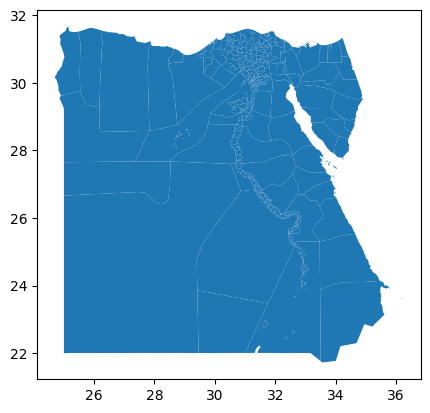

In [4]:
gdf.plot()

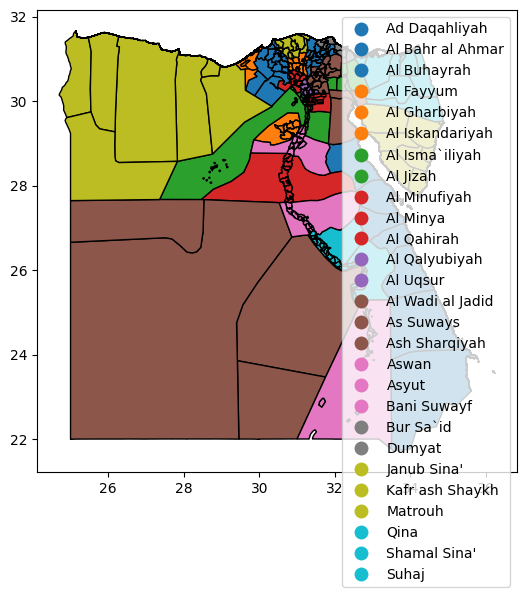

In [5]:
ax= gdf.plot(column='NAME_1', figsize=(10,6), edgecolor='black', legend=True)

<Axes: >

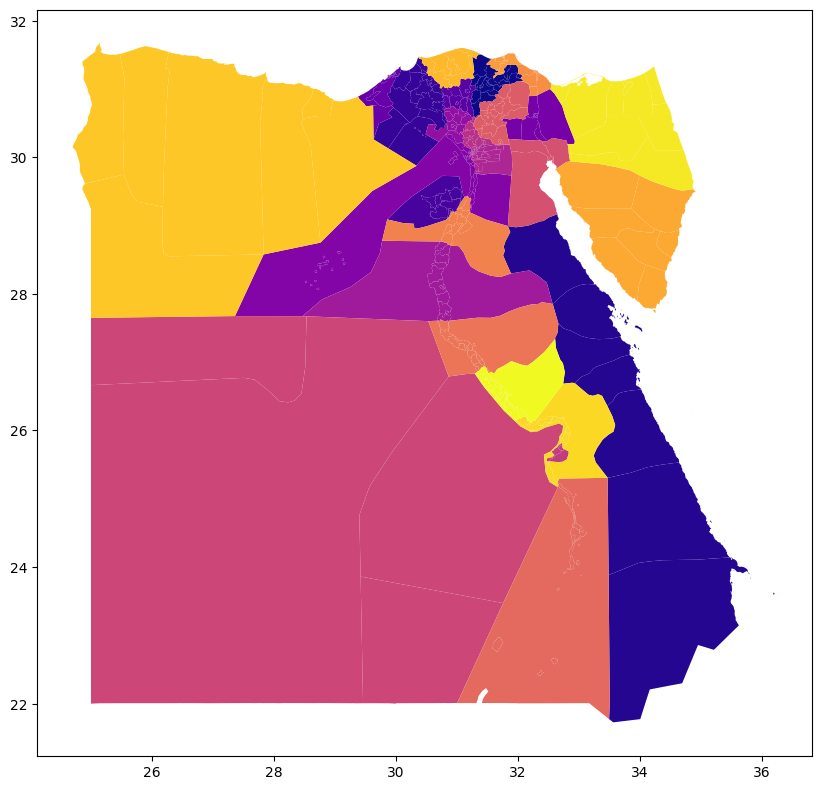

In [6]:
gdf.plot(column = 'NAME_1', cmap = 'plasma', figsize = (10,10))

# **Data Cleaning**

---



In [7]:
null_values = gdf.isnull().sum()
print(null_values)

GID_2        0
GID_0        0
COUNTRY      0
GID_1        0
NAME_1       0
NL_NAME_1    0
NAME_2       0
VARNAME_2    0
NL_NAME_2    0
TYPE_2       0
ENGTYPE_2    0
CC_2         0
HASC_2       0
geometry     0
dtype: int64


In [8]:
duplicates = gdf.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [9]:
print(gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   GID_2      343 non-null    object  
 1   GID_0      343 non-null    object  
 2   COUNTRY    343 non-null    object  
 3   GID_1      343 non-null    object  
 4   NAME_1     343 non-null    object  
 5   NL_NAME_1  343 non-null    object  
 6   NAME_2     343 non-null    object  
 7   VARNAME_2  343 non-null    object  
 8   NL_NAME_2  343 non-null    object  
 9   TYPE_2     343 non-null    object  
 10  ENGTYPE_2  343 non-null    object  
 11  CC_2       343 non-null    object  
 12  HASC_2     343 non-null    object  
 13  geometry   343 non-null    geometry
dtypes: geometry(1), object(13)
memory usage: 37.6+ KB
None


# GIS Operations

In [10]:
Clip = gpd.read_file('gadm41_EGY_1.shp')
indexes = Clip.index[:10]
Clip = Clip.iloc[indexes]

<Axes: >

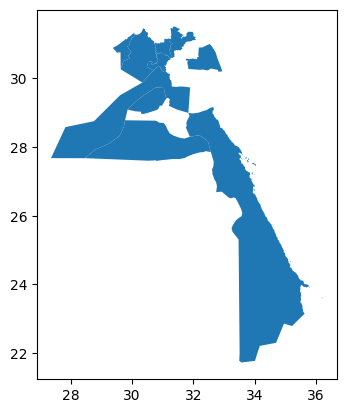

In [11]:
Clip.plot()

In [12]:
Clipped = gdf.clip(Clip)
Clipped

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
23,EGY.2.4_1,EGY,Egypt,EGY.2_1,Al Bahr al Ahmar,محافظة البحر الأحمر,Ash-Shalatin,NA,NA,Kism,Subdivision,NA,EG.BA.SH,"MULTIPOLYGON (((35.47319 24.14069, 35.47388 24..."
24,EGY.2.5_1,EGY,Egypt,EGY.2_1,Al Bahr al Ahmar,محافظة البحر الأحمر,Marsa 'Alam,NA,NA,Kism,Subdivision,NA,EG.BA.MA,"MULTIPOLYGON (((35.37181 24.31569, 35.37153 24..."
230,EGY.17.9_1,EGY,Egypt,EGY.17_1,Aswan,محافظة أسوان,Unorganized in Aswan,NA,NA,unorganized,Subdivision,NA,EG.IK.UO,"MULTILINESTRING ((33.48609 23.88220, 33.49382 ..."
313,EGY.25.13_1,EGY,Egypt,EGY.25_1,Qina,محافظة قنا,Unorganized in Qina,NA,NA,unorganized,Subdivision,NA,EG.IK.UO,"MULTILINESTRING ((32.90985 26.69626, 32.93116 ..."
22,EGY.2.3_1,EGY,Egypt,EGY.2_1,Al Bahr al Ahmar,محافظة البحر الأحمر,Al-Qusayr,NA,NA,Kism,Subdivision,NA,EG.BA.KO,"POLYGON ((33.46647 26.36169, 33.49813 26.38762..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,EGY.1.16_1,EGY,Egypt,EGY.1_1,Ad Daqahliyah,الدقهلية,Mit Salsil,NA,NA,Markaz,Subdivision,NA,EG.DQ.MS,"POLYGON ((31.87227 31.31070, 31.85660 31.28739..."
1,EGY.1.2_1,EGY,Egypt,EGY.1_1,Ad Daqahliyah,الدقهلية,Al-Jamaliyah,NA,NA,Kism,Subdivision,NA,EG.QH.GA,"POLYGON ((31.98231 31.22915, 31.96686 31.24530..."
260,EGY.20.6_1,EGY,Egypt,EGY.20_1,Bur Sa`id,محافظة بورسعيد,Al-Manasrah,NA,NA,Kism,Subdivision,NA,EG.BS.MA,"MULTILINESTRING ((31.99799 31.22747, 32.00703 ..."
270,EGY.21.4_1,EGY,Egypt,EGY.21_1,Dumyat,NA,Faraskur,NA,NA,Markaz,Subdivision,NA,EG.DT.FA,"MULTILINESTRING ((31.82154 31.35652, 31.80301 ..."


In [31]:
geometry = Clipped['geometry']

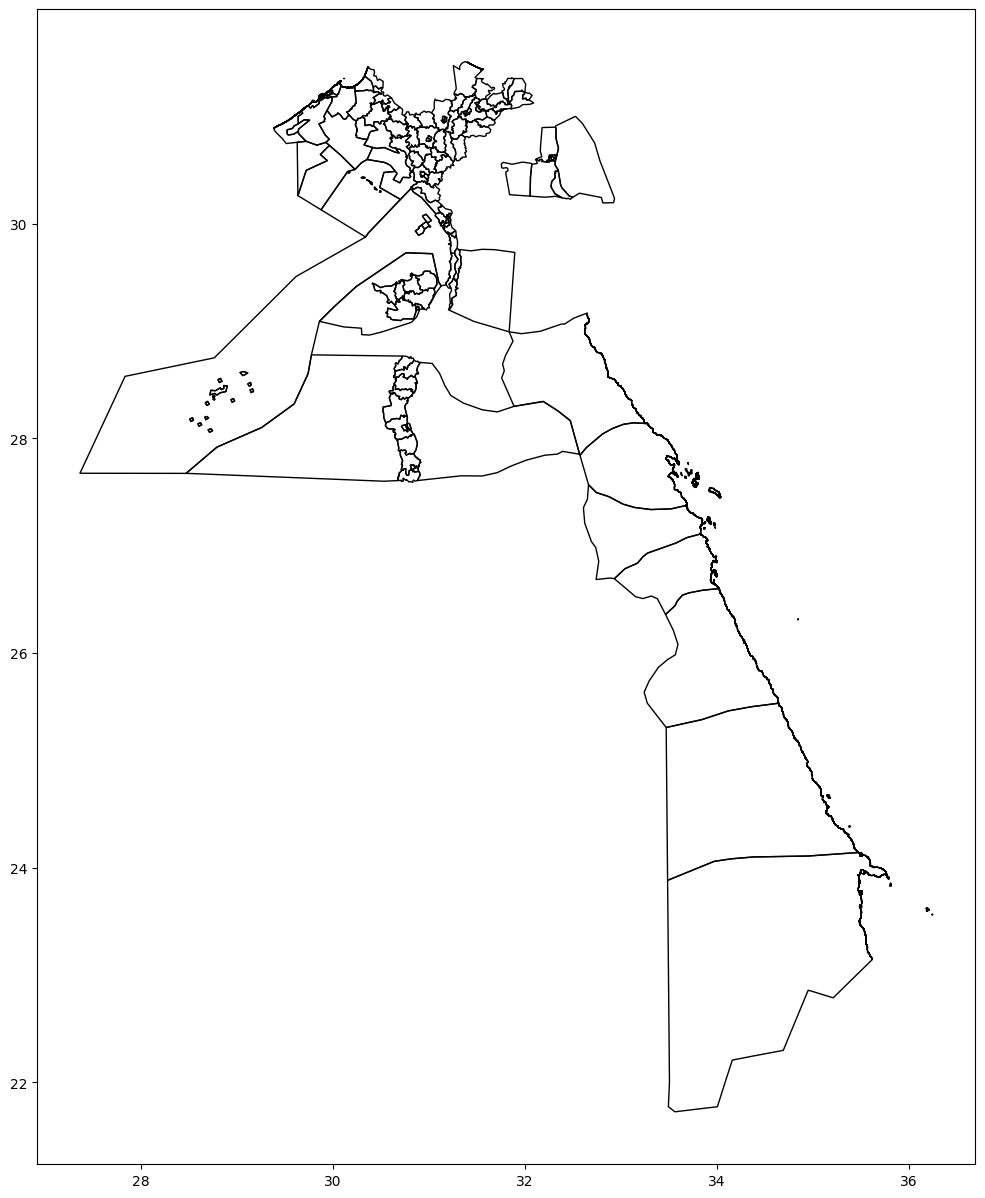

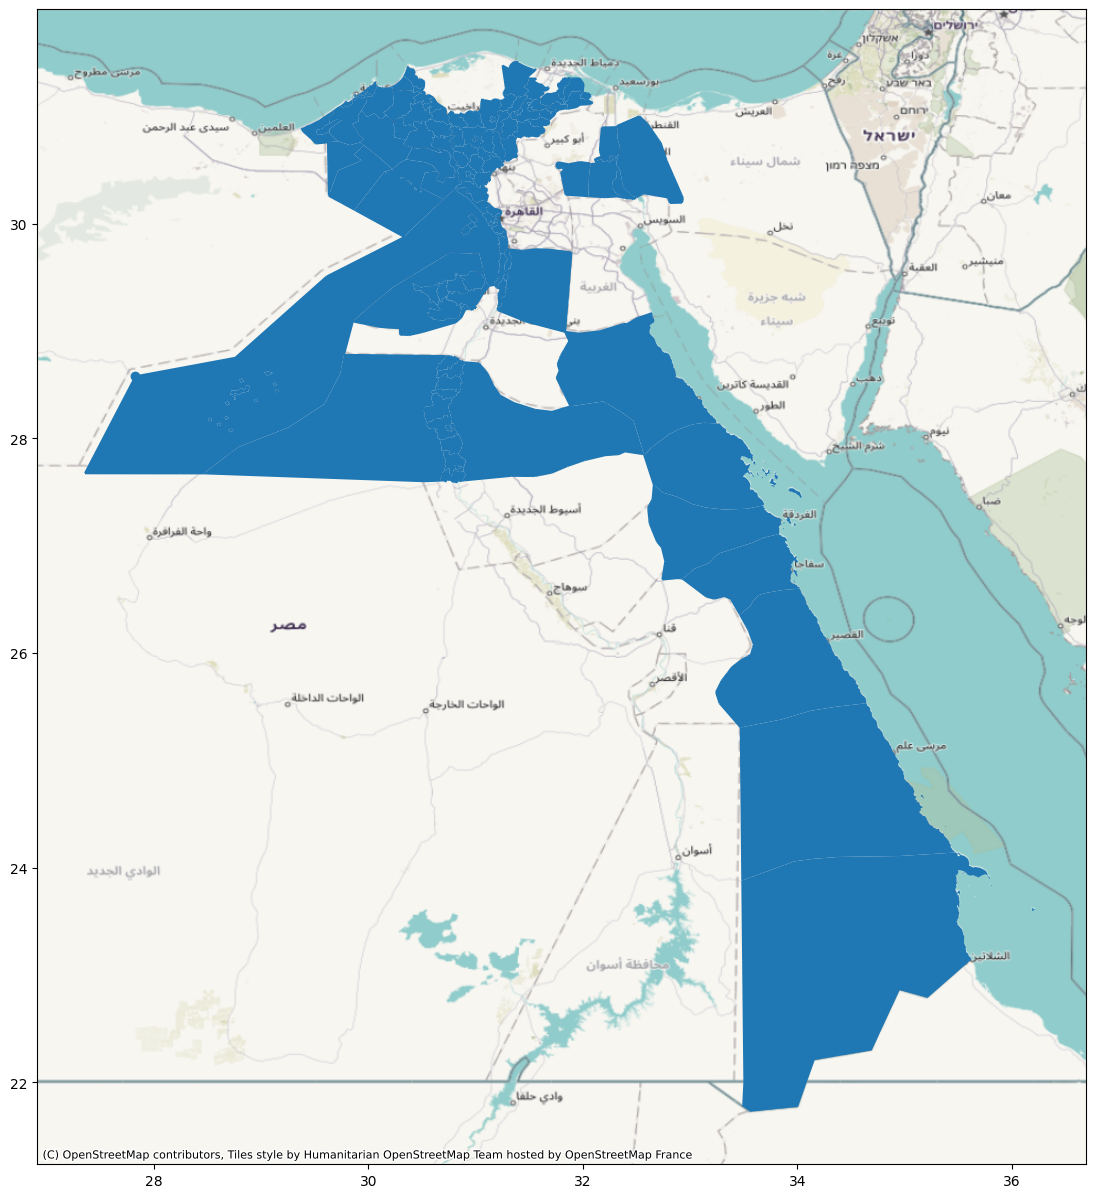

In [32]:
ax = geometry.plot(figsize=(15,15), color="None")
ax = Clipped.plot(figsize=(15,15))
cx.add_basemap(ax, crs=Clipped.crs)

In [14]:
inter = gpd.read_file('gadm41_EGY_1.shp')
indexes = inter.index[20:]
inter = inter.iloc[indexes]

In [15]:
intersection = gdf.overlay(inter, how='intersection')

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:2451: UserWarning: `keep_geom_type=True` in overlay resulted in 54 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


In [ ]:
geometry = intersection['geometry']

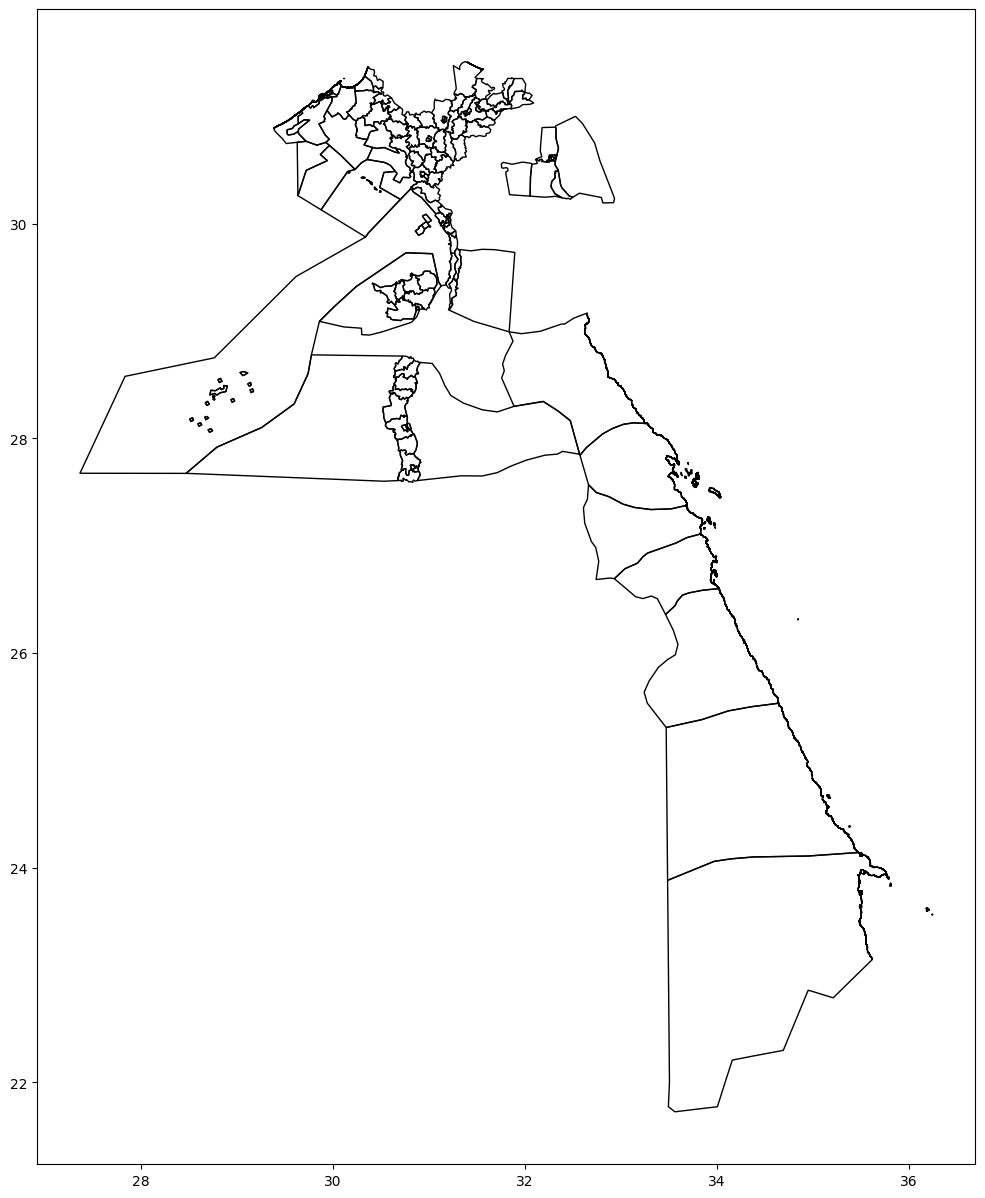

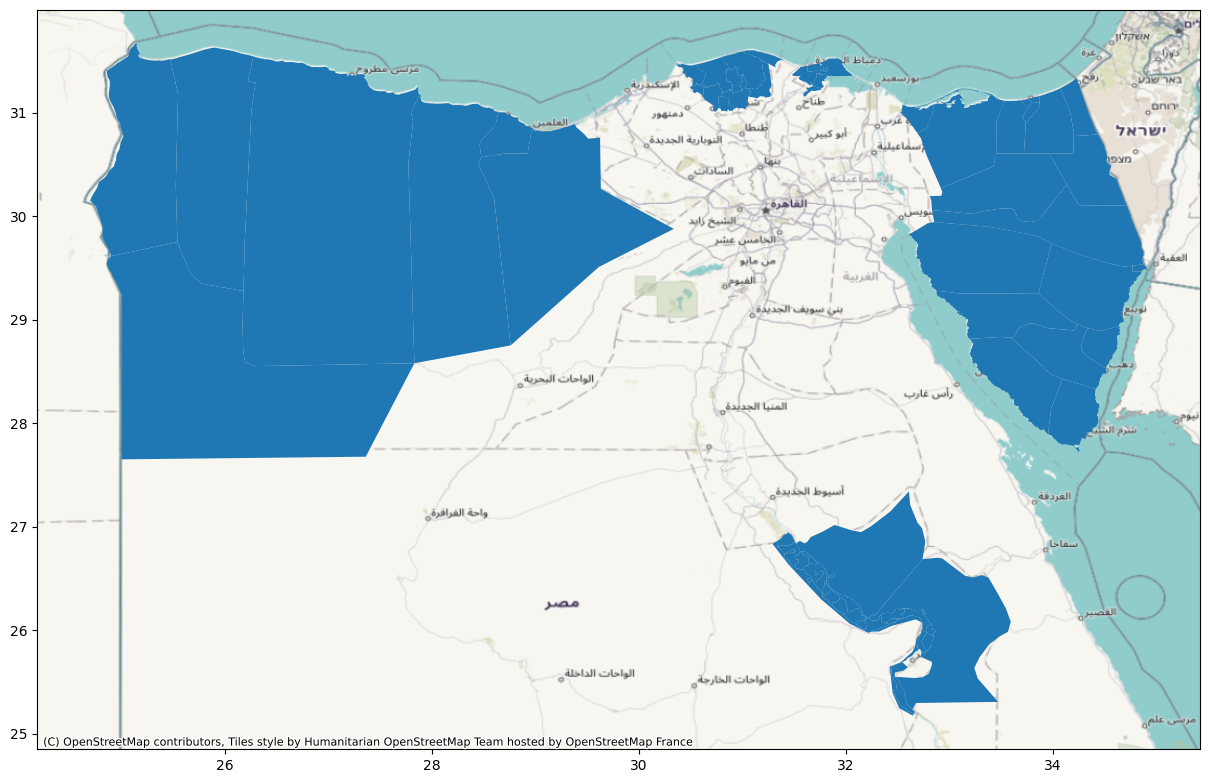

In [33]:
ax = geometry.plot(figsize=(15,15), color="None")
ax = intersection.plot(figsize=(15,15))
cx.add_basemap(ax, crs=intersection.crs)

In [35]:
buffer_distance = 0.5
buffered = gdf.copy()
buffered['geometry'] = gdf.geometry.buffer(buffer_distance)

<ipython-input-35-d47a0eacf464>:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered['geometry'] = gdf.geometry.buffer(buffer_distance)


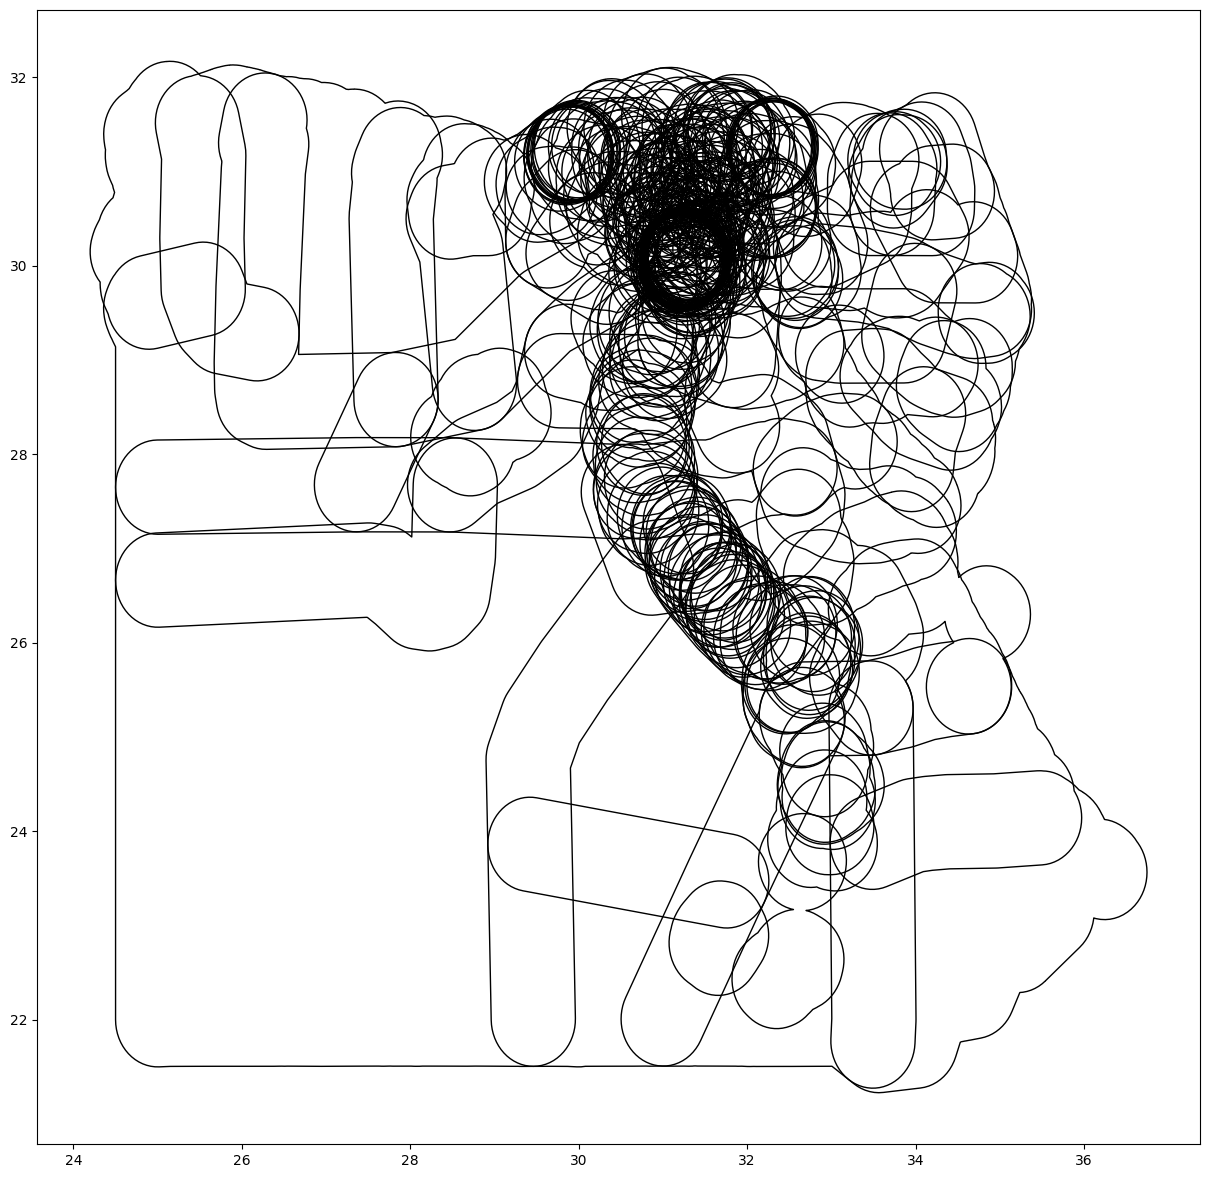

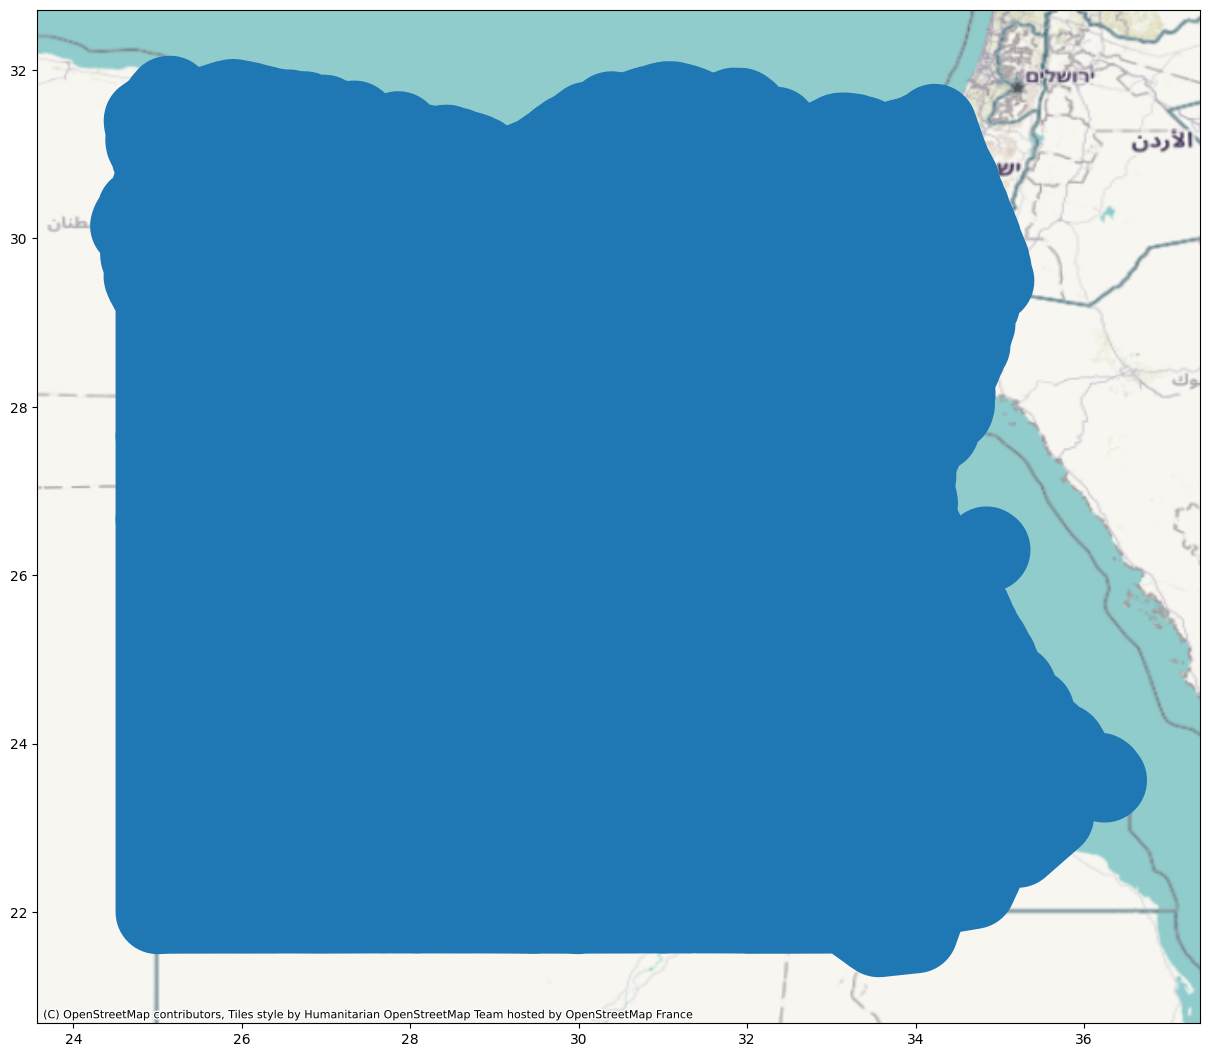

In [36]:
geometry = buffered['geometry']
ax = geometry.plot(figsize=(15,15), color="None")
ax = buffered.plot(figsize=(15,15))
cx.add_basemap(ax, crs=buffered.crs)

In [19]:
categorical_columns = gdf.select_dtypes(include=['object']).columns.tolist()
#categorical_columns.remove('geometry')

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    gdf[col] = le.fit_transform(gdf[col])
    label_encoders[col] = le


In [20]:
X = gdf.drop(columns=['TYPE_2', 'geometry'])  # Features
y = gdf['TYPE_2']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.70      0.77      0.73        43
           2       0.76      0.80      0.78        49
           3       0.00      0.00      0.00         3
           4       0.67      0.67      0.67         3

    accuracy                           0.73       103
   macro avg       0.53      0.49      0.49       103
weighted avg       0.70      0.73      0.71       103



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-21-60ccd1f7f3e4>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.unary_union.centroid


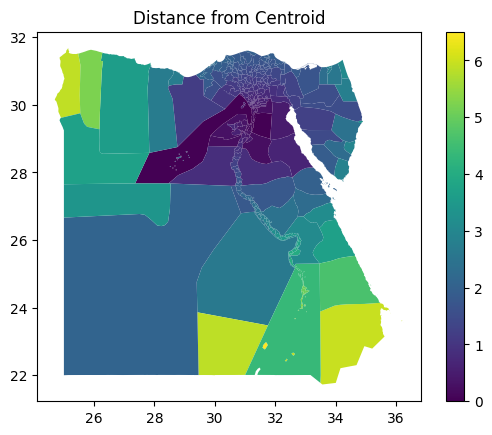

Spatial outliers identified:
      GID_2  GID_0  COUNTRY  GID_1  NAME_1  NL_NAME_1  NAME_2  VARNAME_2  \
23     158      0        0     19       1          6     117         29   
24     159      0        0     19       1          6     212         29   
192     92      0        0      4      13         13     144         29   
222    122      0        0      7      16          3      12         29   
223    123      0        0      7      16          3     123         29   
224    124      0        0      7      16          3     124         29   
225    125      0        0      7      16          3     161         29   
227    127      0        0      7      16          3     203         29   
228    128      0        0      7      16          3     231         29   
229    129      0        0      7      16          3     244         29   
296    203      0        0     15      23         20     113         29   
299    206      0        0     15      23         20     292         2

In [21]:
centroid = gdf.geometry.centroid.unary_union.centroid

gdf['distance_from_centroid'] = gdf.geometry.apply(lambda x: x.distance(centroid))


gdf.plot(column='distance_from_centroid', legend=True)
plt.title('Distance from Centroid')
plt.show()

Q1 = gdf['distance_from_centroid'].quantile(0.25)
Q3 = gdf['distance_from_centroid'].quantile(0.75)
IQR = Q3 - Q1
threshold = Q3 + 1.5 * IQR

spatial_outliers = gdf[gdf['distance_from_centroid'] > threshold]
print("Spatial outliers identified:\n", spatial_outliers)

**Clustring**

---



In [22]:
gdf['centroid'] = gdf.geometry.centroid

# Create a new GeoDataFrame with centroids
centroids_gdf = gpd.GeoDataFrame(gdf[['centroid']], geometry='centroid')
print(centroids_gdf.head())

                    centroid
0  POINT (31.30851 30.89424)
1  POINT (31.90862 31.26762)
2  POINT (31.46652 31.03365)
3  POINT (31.37960 31.03338)
4  POINT (31.41273 31.04715)


<ipython-input-22-ca17fbeb7828>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid


In [24]:
# Extract the coordinates of the centroids
coords = np.array(list(centroids_gdf.geometry.apply(lambda x: (x.x, x.y))))

# Apply DBSCAN clustering
db = DBSCAN(eps=0.1, min_samples=5, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

# Add the cluster labels to the GeoDataFrame
centroids_gdf['cluster'] = db.labels_

print(centroids_gdf)

                      centroid  cluster
0    POINT (31.30851 30.89424)        0
1    POINT (31.90862 31.26762)        0
2    POINT (31.46652 31.03365)        0
3    POINT (31.37960 31.03338)        0
4    POINT (31.41273 31.04715)        0
..                         ...      ...
338  POINT (31.70607 26.54233)        0
339  POINT (31.46357 26.78530)        0
340  POINT (31.49020 26.76587)        0
341  POINT (31.42511 26.86811)        0
342  POINT (32.20849 26.69773)        0

[343 rows x 2 columns]


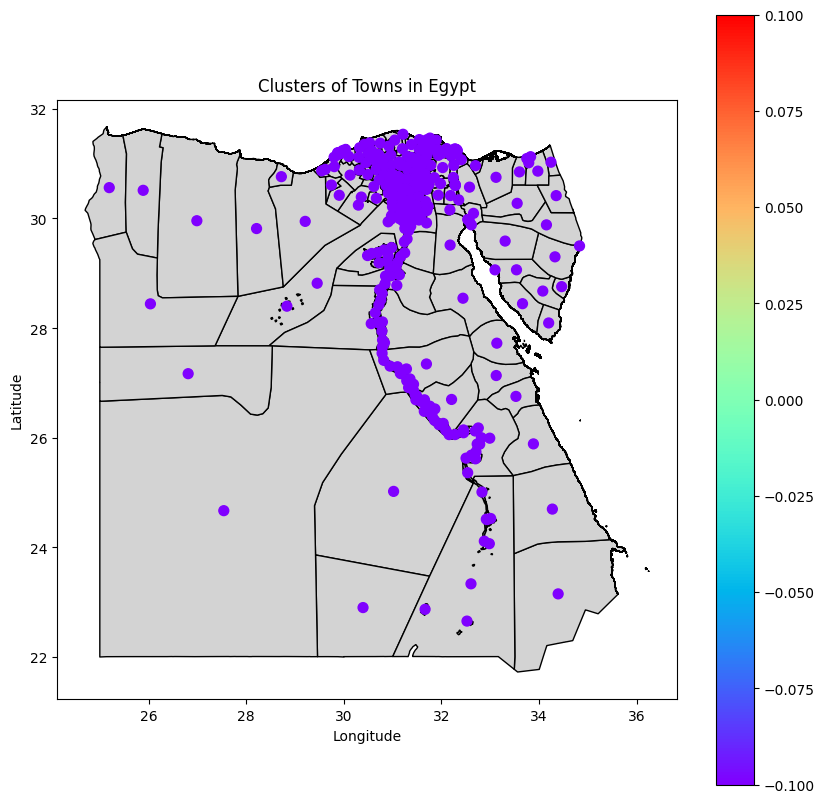

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='lightgrey', edgecolor='black')
centroids_gdf.plot(ax=ax, column='cluster', cmap='rainbow', legend=True, markersize=50)
plt.title('Clusters of Towns in Egypt')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()